In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [16]:
warnings.filterwarnings('ignore')

In [17]:

gold_dataset = pd.read_csv('gld_price_data.csv')
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<Axes: >

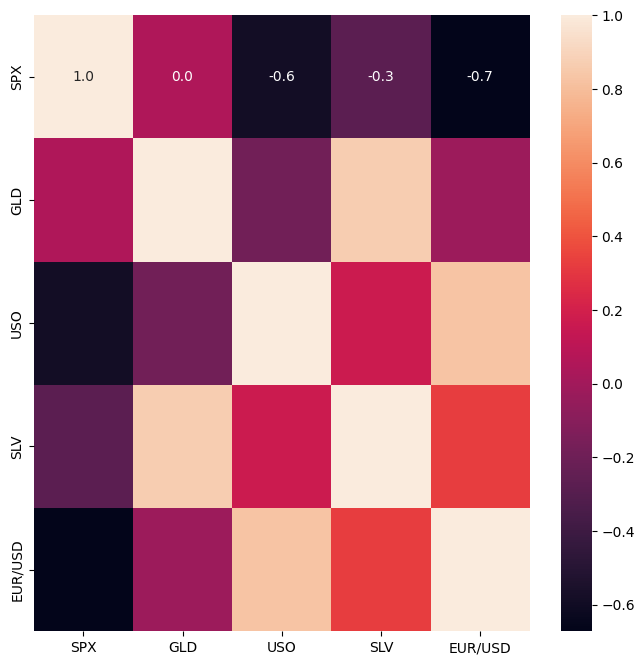

In [19]:
correlation = gold_dataset.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation,fmt='.1f',annot=True)


In [20]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [21]:
X=gold_dataset.drop(columns=['Date','GLD'],axis=1)
Y=gold_dataset['GLD']

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

scaler = StandardScaler()

# transformer = ColumnTransformer([
#     ('StandardScaler',scaler,)
# ])
pipeline = Pipeline([
    ('preprocessor',scaler),
    ('model',RandomForestRegressor())
])


param_grid = [
    {'model': [RandomForestRegressor()]},
    {'model': [RandomForestClassifier()]},
    {'model': [Lasso()]},
    {'model': [LinearRegression()]},
]

grid_search =GridSearchCV(pipeline,param_grid,scoring='accuracy')
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
grid_search.fit(X_train,Y_train)
best_model = grid_search.best_estimator_
Y_train_pred = best_model.predict(X_train)
Y_test_pred=best_model.predict(X_test)

print('Best model is',grid_search.best_params_['model'])
print('Training r2 score: ',r2_score(Y_train,Y_train_pred))
print('Test Set r2 score: ',r2_score(Y_test,Y_test_pred))

lr=Lasso()
lr.fit(X_train,Y_train)
lr_y_train_pred = lr.predict(X_train)
lr_y_test_pred = lr.predict(X_test)
print('r2 train',r2_score(Y_train,lr_y_train_pred))
print('r2 train',r2_score(Y_test,lr_y_test_pred))


Best model is RandomForestRegressor()
Training r2 score:  0.9984352075790183
Test Set r2 score:  0.9892936106552043
r2 train 0.8843915387307152
r2 train 0.8644937172756186
